# Classification
## Decision Tree, Random Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
icu = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/ICU.csv").iloc[:,1:]
icu.head()

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,4,0,87,3,1,1,80,96,1
1,8,1,27,1,1,1,142,88,1
2,12,1,59,2,0,0,112,80,1
3,14,1,77,3,0,0,100,70,0
4,27,0,76,3,1,1,128,90,1


In [3]:
# Check data types
icu.dtypes

ID           int64
Survive      int64
Age          int64
AgeGroup     int64
Sex          int64
Infection    int64
SysBP        int64
Pulse        int64
Emergency    int64
dtype: object

In [4]:
# Check for missing values
icu.isna().sum()

ID           0
Survive      0
Age          0
AgeGroup     0
Sex          0
Infection    0
SysBP        0
Pulse        0
Emergency    0
dtype: int64

In [5]:
# Split the data
X = icu.iloc[:,2:]
y = icu["Survive"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [7]:
# Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

Let's tune the hyperparameter 'max_depth' using a decision tree.

In [8]:
# Hyper Parameter tuning
# Decission Tree
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [9]:
clf_dt.tree_.max_depth

12

Best Depth:	1
Min Error Rate:	0.16666666666666663


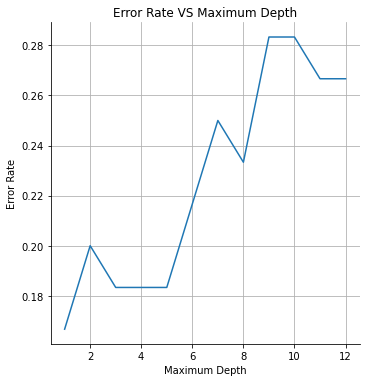

In [10]:
best_depth = 0
min_error = 1
error_rates = []
depths = []
for i in range(1, clf_dt.tree_.max_depth+1):
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    error_rates.append(metrics.zero_one_loss(y_test, y_test_pred))
    depths.append(i)
    if metrics.zero_one_loss(y_test, y_test_pred) < min_error:
        best_depth = i
        min_error = metrics.zero_one_loss(y_test, y_test_pred)

sns.relplot(x=depths, y=error_rates, kind="line")
plt.title("Error Rate VS Maximum Depth")
plt.ylabel("Error Rate")
plt.xlabel("Maximum Depth")
plt.grid()

print(f"Best Depth:\t{best_depth}")
print(f"Min Error Rate:\t{error_rates[np.argmin(error_rates)]}")

Let's tune the hyperparameter 'n_estimators' using a random forest.

In [11]:
# Random Forest
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Best Num Estimators:	7
Min Error Rate:		0.1166666666666667


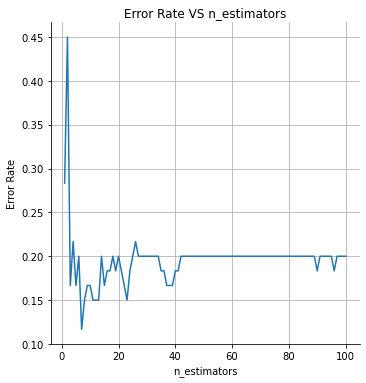

In [12]:
best_num_est = 0
min_error = 1
error_rates = []
num_estimators = []
for i in range(1, clf_rf.n_estimators+1):
    clf_rf = RandomForestClassifier(n_estimators=i, random_state=0)
    clf_rf.fit(X_train, y_train)
    y_test_pred = clf_rf.predict(X_test)
    error_rates.append(metrics.zero_one_loss(y_test, y_test_pred))
    num_estimators.append(i)
    if metrics.zero_one_loss(y_test, y_test_pred) < min_error:
        best_num_est = i
        min_error = metrics.zero_one_loss(y_test, y_test_pred)

sns.relplot(x=num_estimators, y=error_rates, kind="line")
plt.title("Error Rate VS n_estimators")
plt.ylabel("Error Rate")
plt.xlabel("n_estimators")
plt.grid()

print(f"Best Num Estimators:\t{best_num_est}")
print(f"Min Error Rate:\t\t{error_rates[np.argmin(error_rates)]}")

In [13]:
# Accuracy Score
clf_dt = DecisionTreeClassifier(max_depth=best_depth)
clf_dt.fit(X_train, y_train)
y_test_pred = clf_dt.predict(X_test)
print(f"Decision Tree Accuracy:\t{metrics.accuracy_score(y_test, y_test_pred)}")

clf_rf = RandomForestClassifier(n_estimators=best_num_est, random_state=0)
clf_rf.fit(X_train, y_train)
y_test_pred = clf_rf.predict(X_test)
print(f"Random Forest Accuracy:\t{metrics.accuracy_score(y_test, y_test_pred)}")

Decision Tree Accuracy:	0.8333333333333334
Random Forest Accuracy:	0.8833333333333333


### Conclusion

Yes, surviving ICU can be predicted by using a random forest model and a decision tree model. Both models are similar in terms of accuracy and can both be used to predict the survival rate of ICU.